In [37]:
from autocluster import AutoCluster

import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
df = pd.read_csv("../data/Financial_Distress.csv").drop(columns=['Time', 'Company', 'Financial Distress', 'class'])
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,0.182790,0.006449,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,0.035991,0.001795,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,-0.765400,-0.054324,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.107910,-0.065316,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,0.577250,0.094075,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [ ]:
cluster = AutoCluster()
smac_obj, opt_cfg = cluster.fit_raw_data(df=df, numerical_cols=list(df.columns), n_evaluations=50)

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:66: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '') > 0
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:70: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size


Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1000], Default: 100
    bin_seeding___MeanShift, Type:

Fitting configuration: 
{'branching_factor___Birch': 69, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 5, 'random_state___KernelPCA': 4, 'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4}
Score obtained by this configuration: -0.9985048953408252
Fitting configuration: 
{'branching_factor___Birch': 184, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 6, 'random_state___KernelPCA': 2, 'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4}
Score obtained by this configuration: -0.9975537545738357
Fitting configuration: 
{'branching_factor___Birch': 179, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 19, 'random_state___KernelPCA': 2, 'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (11) by Birch is less than (19). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: -0.9948704967673397
Fitting configuration: 
{'branching_factor___Birch': 929, 'kernel___KernelPCA': 'poly', 'n_clusters___Birch': 8, 'random_state___KernelPCA': 4, 'clustering_choice': 'Birch', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 4}
Score obtained by this configuration: -0.9956376429850761
Fitting configuration: 
{'affinity___SpectralClustering': 'rbf', 'kernel___KernelPCA': 'poly', 'n_clusters___SpectralClustering': 8, 'random_state___KernelPCA': 1, 'eigen_solver___SpectralClustering': 'arpack', 'clustering_choice': 'SpectralClustering', 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'n_components___KernelPCA': 2}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


performing TSNE


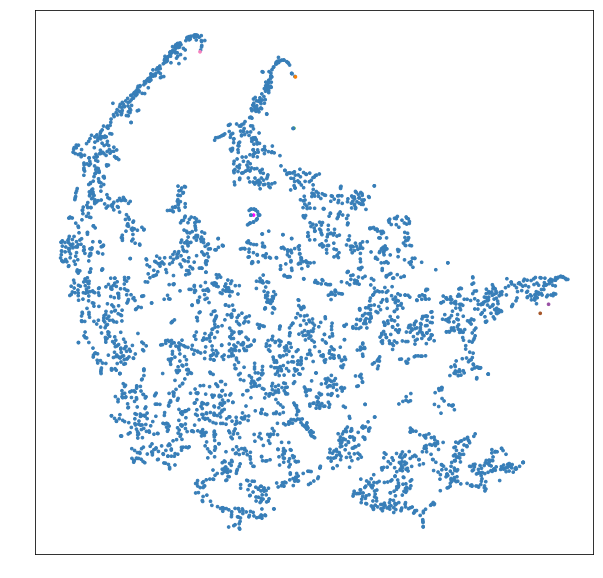

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [27]:
cluster.predict(df.to_numpy())